# **Machine Learning**

Machine Learning es una rama de la inteligencia artificial que se basa en el desarrollo de algoritmos que permiten a las computadoras aprender a partir de los datos. Existen tres tipos principales de aprendizaje en machine learning: supervisado, no supervisado y por refuerzo.

## Aprendizaje Supervisado

El aprendizaje supervisado es un tipo de machine learning donde se proporciona al algoritmo un conjunto de datos de entrada junto con las respuestas correctas correspondientes. El algoritmo aprende a partir de estos datos y luego puede hacer predicciones sobre nuevos datos.

### Clasificación :

La clasificación es una tarea de aprendizaje supervisado que consiste en asignar una etiqueta a una entrada dada. Algunos ejemplos de uso de la clasificación incluyen:

- Detección de fraudes
- Detección de spam
- Diagnósticos
- Clasificación de Imágenes
- Retención de clientes

### Regresión

La regresión es otra tarea de aprendizaje supervisado que consiste en predecir un valor continuo en lugar de una etiqueta. Algunos ejemplos de uso de la regresión incluyen:

- Predicciones
- Pronósticos
- Optimización de procesos
- Nuevas perspectivas

## Aprendizaje NO supervisado

El aprendizaje no supervisado es un tipo de machine learning donde se proporciona al algoritmo un conjunto de datos de entrada sin las respuestas correctas. El algoritmo debe encontrar patrones y estructuras en los datos.

### Reducción de dimensiones

La reducción de dimensiones es una técnica de aprendizaje no supervisado que se utiliza para reducir la cantidad de variables en un conjunto de datos. Algunos ejemplos de uso de la reducción de dimensiones incluyen:

- "Minado" de textos
- Extracción de significados
- Selección de características
- Detección de estructuras / patrones en los datos
- Reconocimiento facial
- Visualizaciones del Big Data
- Reconocimiento de imágenes

### Clustering

El clustering es una técnica de aprendizaje no supervisado que se utiliza para agrupar entradas similares. Algunos ejemplos de uso del clustering incluyen:

- Sistemas de recomendación
- Marketing individualizado
- Segmentación de clientes

## Aprendizaje por refuerzo

El aprendizaje por refuerzo es un tipo de machine learning donde un agente aprende a tomar decisiones basándose en las recompensas y penalizaciones que recibe. Algunos ejemplos de uso del aprendizaje por refuerzo incluyen:

- Oponente "máquina" en los juegos
- Sector financiero
- Manufactura
- Gestión de inventarios
- Adquisición de habilidades
- Toma de decisiones en tiempo real
- Navegación de bots

# **Sistema inmobiliario**

Se busca calcular el precio de ventan, según las caracteristicas de un inmueble, los datos estan en formato JSON

## **Cargar Transformación y Limpieza de datos del JSON**

In [60]:
#Cargar datos
import pandas as pd
import numpy as np

ruta = '/content/drive/MyDrive/Datasets/inmuebles.json'
df = pd.read_json(ruta)
display(df.head(3))
print(df.ident[0])
print(df.listing[0])

#Normalizar datos del JSON para cada columna
df_ident = pd.json_normalize(data = df.ident)
display(df_ident.head(2))
df_listing = pd.json_normalize(data = df.listing, sep="_")
display(df_listing.head(2))

#Concatenar los dos df en uno solo
df_concat = pd.concat([df_ident,df_listing], axis = 1)
display(df_concat.head(2))

#Filtros requeridos para el negocio, solo contar Residencial y en la ciudad de Rio
filtro = (df_concat['types_usage'] == 'Residencial') & (df_concat['address_city'] == 'Rio de Janeiro')
df_concat = df_concat[filtro]

#Ver valores distinctos de la columna zona address_zone
display(f"Valores unicos de zona antes del np.nan son: {df_concat['address_zone'].unique()}")
display(df_concat.address_zone.value_counts())

def hacerNulos(df):
  #df[columna] = df[columna].replace('',np.nan)
  df[df.select_dtypes('object').columns] = df.select_dtypes('object').replace('', np.nan)
  return df

df_concat = hacerNulos(df_concat)

#Ver valores distinctos de la columna zona address_zone
display(f"Valores unicos de zona despues del np.nan son: {df_concat['address_zone'].unique()}")
display(df_concat.address_zone.value_counts())

#Completar las zonas de address_zone usando el barrio (address_neighborhood)
diccionario = df_concat[~df_concat['address_zone'].isna()].set_index('address_neighborhood')['address_zone'].to_dict()
def obtenerZona(barrio):
  return diccionario.get(barrio)

df_concat['address_zone'] = df_concat['address_neighborhood'].apply(obtenerZona)

#Contar nulos de cada columna
print("==="*30)
print("Nulos despues de reemplazar")
df_concat.isna().sum()

#Resetear index
df_concat.reset_index(drop = True, inplace = True)

#Corregir tipos de datos que son float
df_concat = df_concat.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64'
})

#Llenar nulos con 0 en datos int64 o float64
def llenarNulos(df):
  df[df.select_dtypes('int64').columns] = df.select_dtypes('int64').fillna(0)
  df[df.select_dtypes('float64').columns] = df.select_dtypes('float64').fillna(0)
  return df

df_concat = llenarNulos(df_concat)

#Eliminar columnas no necesarias
df_concat.drop(['customerID', 'source', 'types_usage', 'address_city','address_location_lon', 'address_location_lat','address_neighborhood' ], axis = 1, inplace = True)
df_concat.columns

#Cambiar nombre a columnas existentes
diccionario_columnas = {'types_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedrooms',
                      'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
                      'features_unitsOnTheFloor':'unitsOnTheFloor', 'features_unitFloor':'unitFloor'}
df_concat = df_concat.rename(diccionario_columnas, axis = 1)


,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."


{'customerID': '775564-BOJSMVON', 'source': 'Website'}
{'types': {'unit': 'Outros', 'usage': 'Residencial'}, 'address': {'city': 'Rio de Janeiro', 'location': {'lon': -43.413557, 'lat': -22.909429}, 'zone': 'Zona Oeste', 'neighborhood': 'Taquara'}, 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}}, 'features': {'bedrooms': 0, 'bathrooms': 0, 'suites': 0, 'parkingSpaces': 1, 'usableAreas': '62', 'totalAreas': '62', 'floors': 0, 'unitsOnTheFloor': 0, 'unitFloor': 0}}


,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website


,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0


,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0


"Valores unicos de zona antes del np.nan son: ['Zona Oeste' 'Zona Norte' 'Zona Central' 'Zona Sul' '']"

address_zone
Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: count, dtype: int64

"Valores unicos de zona despues del np.nan son: ['Zona Oeste' 'Zona Norte' 'Zona Central' 'Zona Sul' nan]"

address_zone
Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
Name: count, dtype: int64

Nulos despues de reemplazar


## **Analizar Matriz de Correlación**

- Correlación: grado de relación entre las variables. Está relación puede ser positiva o negativa.
- Multicolinealidad: relación perfecta o exacta entre variables.

<Axes: >

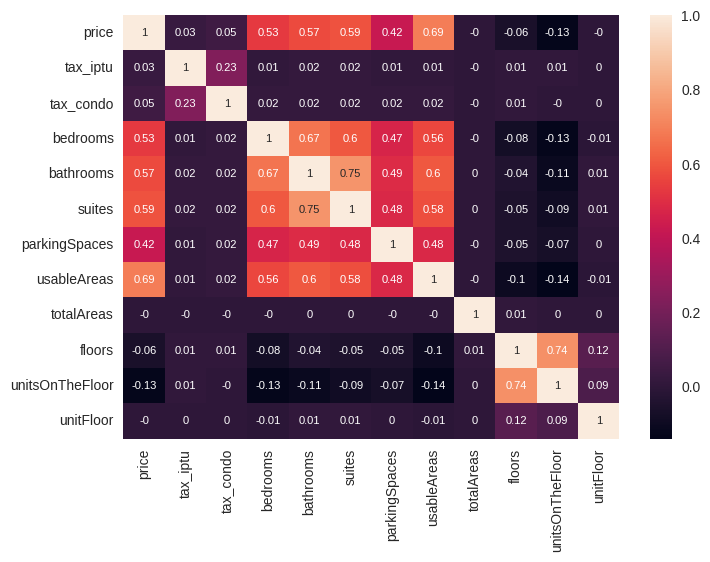

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creacións matriz de correlación
matriz = df_concat.select_dtypes(include = [np.number]).corr().round(2)
sns.heatmap(data=matriz, annot= True,annot_kws={'size': 8})

## **Analizar la distribución de la variable a predecir**

<Axes: xlabel='price', ylabel='Count'>

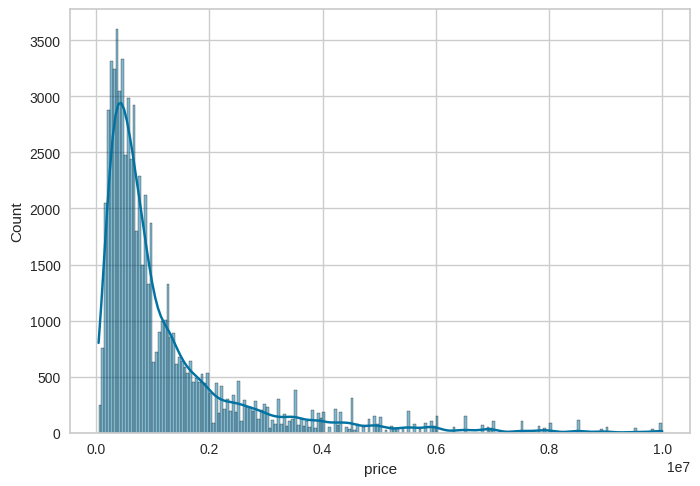

In [62]:
sns.histplot(data = df_concat, x='price', kde=True)

Tenemos una distribución asimétrica, la mayoría de los precios están en un solo valor o rango de valores. Para predecir modelos de alto valor, es posible que el modelo esté sesgado por esa distribución asimétrica. Se requiere un rebalanceo.

## **Analizar la distribución de la variable a predecir transformando los datos**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


<Axes: >

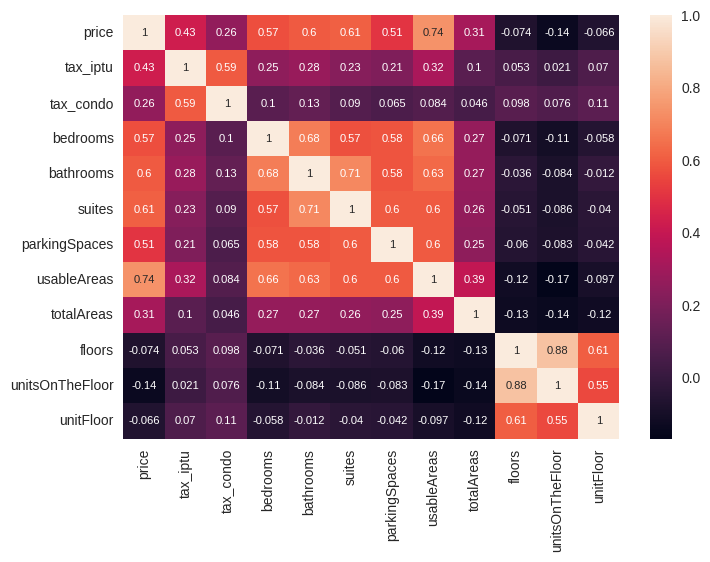

In [63]:
#Transformar las variables númericas
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate = True)
datos_transformados = transformer.transform(df_concat.select_dtypes(exclude=['object'])) # Transformar solo datos númericos, excluyendo object
#Obtenemos desde el df los nombres de las columnas NO object
columnas_datos_transformados = df_concat.select_dtypes(exclude =['object']).columns
df_no_object = pd.DataFrame(datos_transformados,columns=columnas_datos_transformados) #Datos transformados a su valor logaritmico

#Obtenemos desde el df_concat  los datos tipo df, solo object
df_object  = df_concat.select_dtypes(include=['object'])

#Concatenar ambos dataframes
df_tf = pd.concat([df_object,df_no_object], axis = 1)

#Correlación
corr = df_tf.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot = True, annot_kws={'size': 8})

<Axes: xlabel='price', ylabel='Count'>

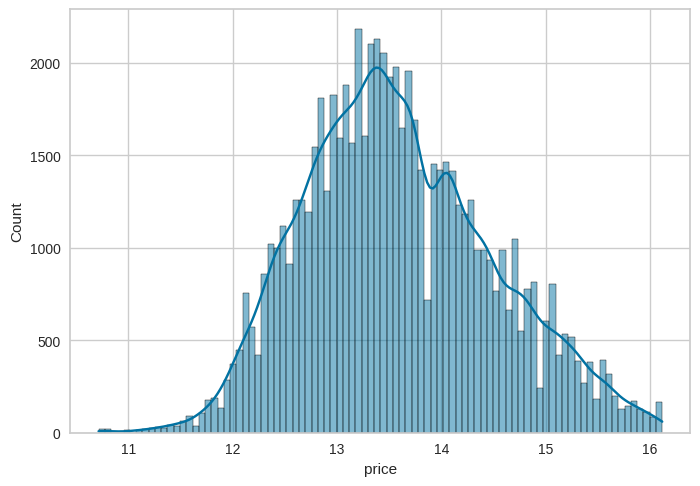

In [64]:
sns.histplot(data= df_tf, x='price', kde = True)

Obtenemos una distribución más simetrica, los valores son proporcionales.

## **Transformar variables categoricas o object a dummies**

In [65]:
#Obtener solo variables categoricas
categoricas = df_tf.select_dtypes(include=['object'])
numerticas = df_tf.select_dtypes(exclude=['object'])
#Crear dummies de las variables categoricas, obtener 1 y 0
dummies = pd.get_dummies(categoricas, dtype = int)

#Concatenamos las dummies con el df de columnas number
df_tf = pd.concat([numerticas,dummies], axis = 1)

In [66]:
df_tf

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,1,0,0,0,0,1,0
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,16.118096,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000,0,1,0,0,0,1,0
69584,16.118096,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000,0,1,0,0,0,1,0
69585,16.118096,0.000000,0.000000,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000,1,0,0,0,0,0,1
69586,16.118096,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294,0,1,0,0,0,1,0


## **Modelo de Regresión Lineal**

El modelo de regresión lineal es una técnica utilizada en estadística para modelar la relación entre una variable dependiente y una o más variables independientes mediante una línea recta. Es uno de los modelos más simples y ampliamente utilizados en el análisis predictivo.

### Principales Hiperparámetros:

- **fit_intercept:** Un booleano que indica si se debe calcular la intercepción para este modelo. Por defecto es True.
- **normalize:** Un booleano que indica si se deben normalizar las variables independientes antes de la regresión. Por defecto es False.
- **copy_X:** Un booleano que indica si se deben copiar los datos de entrada; si es False, los datos de entrada podrían sobrescribirse. Por defecto es True.
- **n_jobs:** Número de trabajos en paralelo a ejecutar. Por defecto es None, lo que significa que un solo núcleo se utilizará. Si es -1, se usarán todos los núcleos disponibles.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


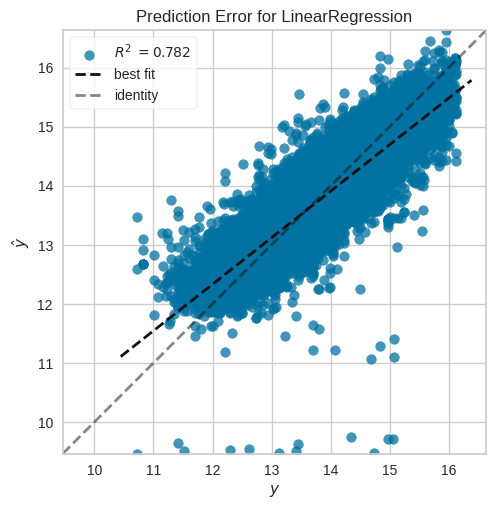

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [67]:
#Modelo de regresión lineal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import PredictionError

# y = Precio del inmueble, es nuestra variable objetivo
# X = resto de variables

X = df_tf.iloc[:,1:] #Todos los datos menos la columna 1 del df
y = df_tf.iloc[:,0] #Solo la columna 1 del df

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)
rl = LinearRegression()
rl.fit(X_train,y_train)

#Probar modelo
y_predict = rl.predict(X_test)

#Graficar R2
pev =  PredictionError(rl)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### Métricas del Modelo

#### Coeficiente de Determinación (R²)

El coeficiente de determinación, comúnmente conocido como R², es una métrica utilizada para evaluar qué tan bien se ajusta una línea de regresión muestral a los datos observados. Sus principales características son:

- R² se encuentra en el rango de 0 a 1, donde un valor más cercano a 1 indica un mejor ajuste del modelo a los datos.
- Mide la proporción o porcentaje de la variación total de la variable dependiente (Y) que es explicada por el modelo de regresión.
- Un valor de R² cercano a 0 sugiere que el modelo no explica la variabilidad de los datos, mientras que un valor cercano a 1 indica un ajuste cercano de la línea de regresión a los puntos de datos observados.

El coeficiente de determinación es una herramienta fundamental para evaluar la calidad del ajuste de un modelo de regresión a los datos observados.


#### MSE (Mean Squared Error - Error Cuadrático Medio)

El MSE, o Error Cuadrático Medio, es una medida que calcula la media de las diferencias al cuadrado entre los valores reales y los valores predichos por el modelo. Sus características principales son:

- Calcula la discrepancia cuadrada entre cada valor predicho y su valor correspondiente en el conjunto de datos real.
- Cuanto menor sea el valor del MSE, mejor será el ajuste del modelo a los datos.
- Es sensible a valores atípicos debido a la naturaleza de elevar al cuadrado las diferencias.

#### MAE (Mean Absolute Error - Error Absoluto Medio)

El MAE, o Error Absoluto Medio, es una medida que calcula la media de las diferencias absolutas entre los valores reales y los valores predichos por el modelo. Sus características principales son:

- Calcula la discrepancia absoluta entre cada valor predicho y su valor correspondiente en el conjunto de datos real.
- Es menos sensible a valores atípicos que el MSE debido a su naturaleza de valor absoluto.
- Proporciona una medida más intuitiva de la precisión del modelo, ya que refleja la magnitud promedio de los errores sin considerar su dirección.

Tanto el MSE como el MAE son medidas comúnmente utilizadas para evaluar el rendimiento de los modelos de regresión, proporcionando información sobre la calidad de las predicciones realizadas.


In [69]:
#Metricas del modelo
from sklearn.metrics import r2_score,  mean_absolute_error, mean_squared_error

r2 = r2_score(y_test,y_predict)
print("El R2 del modelo de regresión lineal es: {}".format(r2))

mse = mean_squared_error(y_test,y_predict)
print("El MSE del modelo de regresión lineal es: {}".format(mse))

mae = mean_absolute_error(y_test,y_predict)
print("El MAE del modelo de regresión lineal es: {}".format(mae))

El R2 del modelo de regresión lineal es: 0.7824373884838973
El MSE del modelo de regresión lineal es: 0.1781222502787726
El MAE del modelo de regresión lineal es: 0.314908954715514


# **Árbol de Decisión para Regresión**

Un árbol de decisión para regresión es un modelo de aprendizaje supervisado utilizado para predecir valores numéricos continuos. Divide iterativamente el conjunto de datos en subconjuntos más pequeños basados en las características de las variables predictoras, con el objetivo de minimizar la varianza del objetivo en cada subconjunto.

## Principales Hiperparámetros:

- **criterion:** Criterio utilizado para medir la calidad de una división. Puede ser "mse" (Mean Squared Error) o "mae" (Mean Absolute Error).
- **splitter:** Estrategia utilizada para elegir la división en cada nodo. Puede ser "best" para elegir la mejor división o "random" para elegir la mejor división aleatoria.
- **max_depth:** La profundidad máxima del árbol. Controla la profundidad máxima de los nodos del árbol. Previene el sobreajuste limitando la cantidad de divisiones.
- **min_samples_split:** Número mínimo de muestras requeridas para dividir un nodo interno. Controla la cantidad mínima de datos necesarios para realizar una división.
- **min_samples_leaf:** Número mínimo de muestras requeridas para ser una hoja. Controla la cantidad mínima de datos que debe tener una hoja.
- **max_features:** Número de características a considerar al buscar la mejor división. Puede ser un int, float o {"auto", "sqrt", "log2"}.


In [71]:
from sklearn.tree import DecisionTreeRegressor

#Iniciar modelo
tree = DecisionTreeRegressor(random_state =42, max_depth=5) #Max_depth es la profundidad del arbol, es decir, las ramas del arbol
tree.fit(X_train,y_train)
tree_predict = tree.predict(X_test)


**Gráfico de Error de Predicción**

Un gráfico de error de predicción es una herramienta visual utilizada para comparar los valores reales con los valores predichos por un modelo de regresión. Su objetivo es evaluar la precisión del modelo al mostrar la discrepancia entre los valores observados y los valores estimados.

En un gráfico de error de predicción ideal, los puntos estarían alineados diagonalmente a 45 grados, lo que indicaría una correspondencia perfecta entre los valores reales y los valores predichos. Sin embargo, en la práctica, es común encontrar desviaciones de esta línea ideal, lo que sugiere errores en las predicciones del modelo.

El análisis de un gráfico de error de predicción permite identificar patrones de error, como sesgos o heterocedasticidad, y evaluar la precisión y la calidad del ajuste del modelo. Es una herramienta útil para comprender la eficacia de un modelo de regresión en la predicción de los valores de la variable dependiente.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


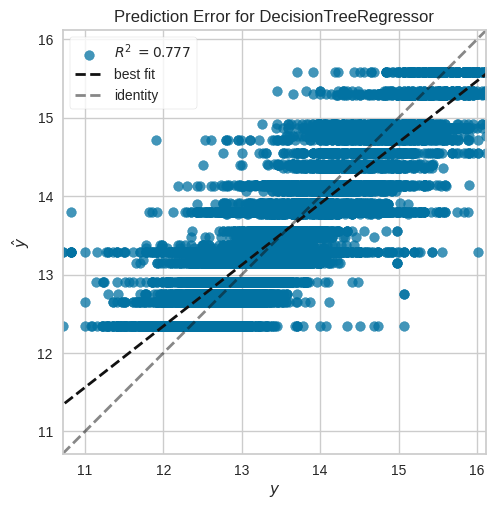

El R2 del modelo de Arbol de Decisión para Regresión es: 0.7769360736431398
El MSE del modelo de Arbol de Decisión para Regresión es: 0.18262627131482828
El MAE del modelo de Arbol de Decisión para Regresión es: 0.31638392249540775


In [75]:
#Graficar el R2 y error de predicción
from yellowbrick.regressor import PredictionError

pev =  PredictionError(tree)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

r2 = r2_score(y_test,tree_predict)
print("El R2 del modelo de Arbol de Decisión para Regresión es: {}".format(r2))

mse = mean_squared_error(y_test,tree_predict)
print("El MSE del modelo de Arbol de Decisión para Regresión es: {}".format(mse))

mae = mean_absolute_error(y_test,tree_predict)
print("El MAE del modelo de Arbol de Decisión para Regresión es: {}".format(mae))

# **Random Forest para Regresión**


**Observació** Los parámetros son prácticamente los mismo entre `DecisionTreeRegreesor()` y `RandomForestRegressor()`, tienen los siguientes parametros:

- `n_estimators:` número de árboles en el bosque
- `bootstrap`: define si se utilizará el método de muestreo estadístico bootstrap
- `cob_score:` define si se utilizará el método de muestreo out-of-bag para medir los errores de predicción
- `n_jobs`. nñumero de jobs que se ejecutan en paralelo (computaciónn paralela - precesadores)
- `warm_star`: adecuación de un nuevo bosque o usa un bosque existente
- `max_sample`s: en caso de que bootstrap sea True, define el número de muestras que se extraerán de X para entrenar cada árbol base.
- `max_depth`: es la profundidad de cada arbol, numero de ramas

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


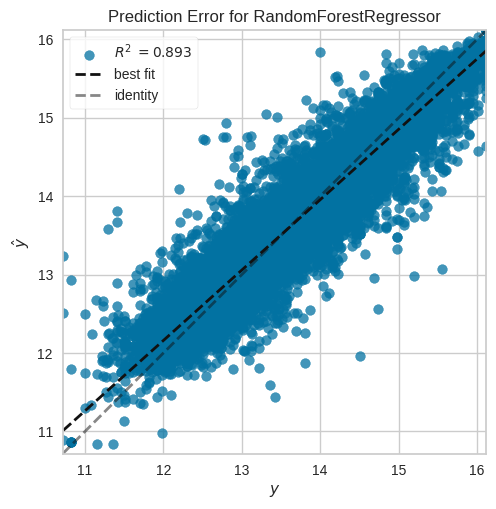

El R2 del modelo de Random Forest es: 0.8928580873157754
El MSE del modelo de Random Forest es: 0.08771892584619646
El MAE del modelo de de Random Forest es: 0.2003428430025718


In [76]:
#Importar librerias
from sklearn.ensemble import RandomForestRegressor
import joblib

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predict= rf.predict(X_test)
rf_predict

pev =  PredictionError(rf)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

r2 = r2_score(y_test,rf_predict)
print("El R2 del modelo de Random Forest es: {}".format(r2))

mse = mean_squared_error(y_test,rf_predict)
print("El MSE del modelo de Random Forest es: {}".format(mse))

mae = mean_absolute_error(y_test,rf_predict)
print("El MAE del modelo de Random Forest es: {}".format(mae))

# **XGBOOST**

**Observación:** Los parámetros más importantes en `XGBRegressor()` son:

- `n_estimators:` Número de árboles a construir.
- `learning_rate:` Tasa de aprendizaje, también conocida como "eta". Reduce la contribución de cada árbol por este factor.
- `max_depth:` Profundidad máxima de un árbol. Incrementar este valor hará que el modelo sea más complejo y más propenso a sobreajustar.
- `subsample:` Fracción de observaciones a seleccionar para cada árbol. Selección se realiza por muestreo aleatorio.
- `colsample_bytree:` Fracción de columnas a seleccionar para cada árbol.
- `alpha:` Término de regularización L1 en el peso de las hojas. Un valor mayor conduce a una regularización más fuerte.
- `lambda:` Término de regularización L2 en el peso de las hojas.
- `gamma:` Reducción mínima de pérdida requerida para hacer una partición adicional en un nodo del árbol. Cuanto mayor es gamma, más conservador será el algoritmo.
- `objective:` Función de pérdida a minimizar. Debe ser compatible con el problema de aprendizaje (regresión, clasificación, etc.).
- `eval_metric:` Métrica a utilizar para la validación de los datos.
- `tree_method:` Método para construir los árboles. `'hist'` hace que XGBoost use la GPU.


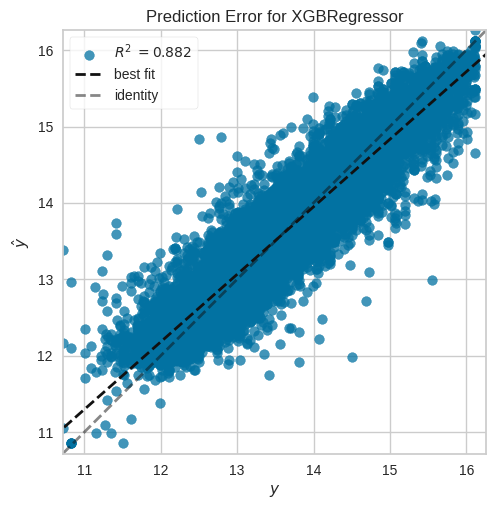

El R2 del modelo XGBOOST es: 0.8822632641838816
El MSE del modelo XGBOOST es: 0.09639308968532119
El MAE del modelo de XGBOOST es: 0.227425496001238


In [77]:
#Librerias
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state = 42, max_depth=5, tree_method='hist') # 'gpu_hist' hace que XGBoost use la GPU
xgb.fit(X_train,y_train)
predict_xgb = xgb.predict(X_test)

pev_xgb =  PredictionError(xgb)
pev_xgb.fit(X_train, y_train)
pev_xgb.score(X_test, y_test)
pev_xgb.poof()

#Metricas Precisión del modelo
r2 = r2_score(y_test,predict_xgb)
print("El R2 del modelo XGBOOST es: {}".format(r2))

mse = mean_squared_error(y_test,predict_xgb)
print("El MSE del modelo XGBOOST es: {}".format(mse))

mae = mean_absolute_error(y_test,predict_xgb)
print("El MAE del modelo de XGBOOST es: {}".format(mae))

# **Técnicas de Optimización de Modelos**

## Herramientas de Optimización
### 1. Cross Validation (Validación Cruzada)
- **Cross Validation** es una técnica ampliamente utilizada para evaluar el rendimiento de los modelos y verificar tendencias en el aprendizaje automático. Consiste en particionar los datos en subconjuntos (partes), donde un subconjunto se usa para entrenamiento y otro subconjunto se usa para probar y evaluar el rendimiento del modelo.
- Los datos particionados son los datos de entrenamiento (70% de los datos originales).
- **K-fold:** el conjunto de entrenamiento se divide aleatoriamente en K subconjuntos de aproximadamente el mismo tamaño; luego se realizan K iteraciones, donde K-1 subconjuntos se utilizan para entrenamiento y 1 para validación.
- El rendimiento calculado por validación cruzada k-fold es el promedio de todos los valores calculados en cada iteración.

### 2. Randomized Parameter Optimization (Optimización Aleatoria de Parámetros)
- Define un espacio de búsqueda como un dominio acotado de valores de hiperparámetros y puntos de muestra aleatorios en ese dominio.
- Imagen en el artículo sobre cómo funciona esta búsqueda.


In [78]:
#División del dataset
from sklearn.model_selection import KFold

#Definit el K - número de subconjuntos
cv = KFold(n_splits = 5, shuffle = True) # n_splits es el numero de subconjutos, shuflle es aleatorios


#### 1. Cross Validation (Validación Cruzada)

In [79]:
#Importar librerias
from sklearn.model_selection import cross_val_score

ac_cross_r2 = cross_val_score (estimator = tree,
                               X = X_train,
                               y= y_train,
                               scoring = 'r2',
                               cv = cv)
print('Accuracy promedio del modelo Arbol de Decisión r2 es de: {}'.format(round(ac_cross_r2.mean(), 3)))


Accuracy promedio del modelo Arbol de Decisión r2 es de: 0.775


#### 2. Randomized Parameter Optimization (Optimización Aleatoria de Parámetros)


In [81]:
#Importar librerias
from sklearn.model_selection import RandomizedSearchCV

#Definimos los hiperparametros para escoger el mejor
param_random_dt = {
  'criterion' : ['squared_error', 'absolute_error'],
  'max_depth': [16,20],
  'min_samples_leaf': [10,20],
  'min_samples_split': [5,8],
  'max_features': ['sqrt','log2','auto']
}

random_cv_dt = RandomizedSearchCV(
    tree,
    param_random_dt,
    n_iter = 5, #Numero de veces que quiero ejecutar el modelo, en cada ejecución seleccionar los valores de hiperparametros
    cv=cv, #Cross Validation
    scoring = 'r2', #Metodo para medir el resultado
    n_jobs=-1 #Tareas trabajando al mismo tiempo
)

randomcv_tree = random_cv_dt.fit(X_train, y_train)
display(randomcv_tree.best_params_)
display(randomcv_tree.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


0.8589692838530807

#### Modelo de Árbol de Decisión para Regresión **Optimizado**

Se usan los parámetros recomendados por Randomized Parameter.


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


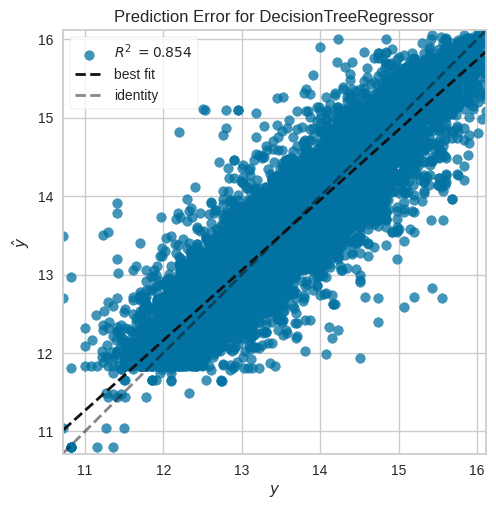

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [82]:
tree_optim = DecisionTreeRegressor(random_state =42,min_samples_split= 10, min_samples_leaf= 5, max_features= 'auto',max_depth= 16, criterion= 'squared_error' )
tree_optim.fit(X_train,y_train)
tree_predict_opm = tree_optim.predict(X_test)

pev_tree_optim =  PredictionError(tree_optim)
pev_tree_optim.fit(X_train, y_train)
pev_tree_optim.score(X_test, y_test)
pev_tree_optim.poof()

## Optimizar Random Forest

In [ ]:
#Cross validation
ac_rf_cross_r2 = cross_val_score (estimator = rf,
                               X = X_train,
                               y= y_train,
                               scoring = 'r2',
                               cv = cv)
print('Accuracy promedio del modelo Random Forest r2: {}'.format(round(ac_rf_cross_r2.mean(), 3)))

#Definimos los hiperparametros para escoger el mejor
param_random_rf = {
  'n_estimators' : [50,100,150,200],
  'max_depth': [5,20,30,None],
  'min_samples_leaf': [3,1],
  'min_samples_split': [8,10,2],
}

random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter = 5, #Numero de veces que quiero ejecutar el modelo, en cada ejecución seleccionar los valores de hiperparametros
    cv=cv, #Cross Validation
    scoring = 'r2', #Metodo para medir el resultado
    n_jobs=-1, #Tareas trabajando al mismo tiempo
    random_state = 42
)

randomcv_rf = random_cv_rf.fit(X_train, y_train)
print(randomcv_rf.best_params_)
print(randomcv_rf.best_score_)

Accuracy promedio de r2: 0.894


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
0.8947912198255402


In [ ]:
#Modelo de random forest optimizado
rf_optimizado = RandomForestRegressor(n_estimators=150, random_state=42,min_samples_split= 10, min_samples_leaf= 1, max_depth= 20)
rf_optimizado.fit(X_train, y_train)
rf_predict_optimizado= rf_optimizado.predict(X_test)
rf_predict_optimizado

pev =  PredictionError(rf_optimizado)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

# Optimizar XGBoost

In [ ]:
#Cross validation
ac_xgb_cross_r2 = cross_val_score (estimator = xgb,
                               X = X_train,
                               y= y_train,
                               scoring = 'r2',
                               cv = cv)
print('Accuracy promedio de r2: {}'.format(round(ac_xgb_cross_r2.mean(), 3)))

#Definimos los hiperparametros para escoger el mejor
param_random_xgb = {
  'n_estimators' : [150,200],
  'max_depth': [20,30],
  'min_samples_leaf': [3,1],
  'min_samples_split': [10,2],
}

random_cv_xgb = RandomizedSearchCV(
    xgb,
    param_random_xgb,
    n_iter = 4, #Numero de veces que quiero ejecutar el modelo, en cada ejecución seleccionar los valores de hiperparametros
    cv=cv, #Cross Validation
    scoring = 'r2', #Metodo para medir el resultado
    n_jobs=-1, #Tareas trabajando al mismo tiempo
    random_state = 42
)

randomcv_xgb = random_cv_xgb.fit(X_train, y_train)
print(randomcv_xgb.best_params_)
print(randomcv_xgb.best_score_)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:33:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:33:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:33:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

Accuracy promedio de r2: 0.885


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:36:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:36:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': None}
0.8897498971673901


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:39:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split", "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


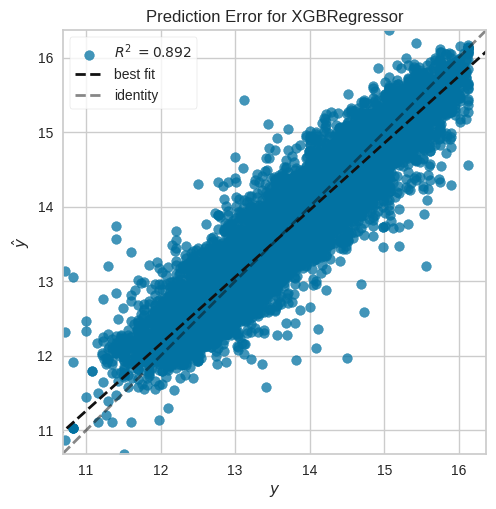

<Axes: title={'center': 'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
#Modelo de XGBoost optimizado
import xgboost as xgb

xgb_optimizado = xgb.XGBRegressor(n_estimators= 200, min_samples_split= 10, min_samples_leaf= 3, max_depth= None,tree_method='hist', predictor='gpu_predictor')
xgb_optimizado.fit(X_train, y_train)
xgb_predict_optimizado= xgb_optimizado.predict(X_test)
xgb_predict_optimizado

pev_xgb =  PredictionError(xgb_optimizado)
pev_xgb.fit(X_train, y_train)
pev_xgb.score(X_test, y_test)
pev_xgb.poof()

# **Selección del mejor modelo**

In [ ]:
#Tabla de resultados

#Random Search
print('Random Search')
print("="*30)
print("Arbol de decisión: %f" % r2_score(y_test,tree_predict_opm ))
print("Random Forest: %f" % r2_score(y_test, rf_predict_optimizado))
print("XGbost: %f" % r2_score(y_test, xgb_predict_optimizado))
print("*"*30)

#Cross Validation
print("Cross Validation")
print("*"*30)
print("Arbol de Desición: %f" % round(ac_cross_r2.mean(),3))
print("Random Forest: %f" % round(ac_rf_cross_r2 .mean(),3))
print("XGBoost: %f" % round(ac_xgb_cross_r2 .mean(),3))

Random Search
Arbol de decisión: 0.859301
Random Forest: 0.895586
XGbost: 0.892133
******************************
Cross Validation
******************************
Arbol de Desición: 0.783000
Random Forest: 0.894000
XGBoost: 0.885000


# **Probar el mejor modelo**


In [ ]:
cliente = pd.DataFrame({'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento':[0],	'unit_Casa':[1],	'unit_Outros':[0],	'zone_Zona Central':[0],	'zone_Zona Norte':[0],	'zone_Zona Oeste':[1],	'zone_Zona Sul':[0]})

#verificar el resultado
prediction_casa = rf_optimizado.predict(cliente)
np.expm1(prediction_casa)

,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0
